In [1]:
import pandas

In [8]:
import numpy as np

In [2]:
dd = pandas.read_csv('AgeDataset-V1.csv')

In [3]:
df = dd[['Name','Age of death']]

In [4]:
df['Age of death'] = df['Age of death'].convert_dtypes('int')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9700\1517470679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age of death'] = df['Age of death'].convert_dtypes('int')


In [5]:
df = df.dropna()

In [31]:
people_df = df.rename(columns={'Name': 'name', 'Age of death': 'age'})


In [9]:
# Generate random years for the new column
min_year = 500
max_year = 2024
random_years = np.random.randint(low=min_year, high=max_year + 1, size=len(df))
# Create a new column named 'comuln' and assign the random years
people_df['year'] =random_years 
people_df.head()

,name,age,year
0,George Washington,67,2023
1,Douglas Adams,49,1433
2,Abraham Lincoln,56,1135
3,Wolfgang Amadeus Mozart,35,1043
4,Ludwig van Beethoven,57,832


### grover

In [10]:
from qiskit import QuantumCircuit, transpile,assemble
from qiskit_aer import Aer
import random
import time 

In [32]:
people_df.loc[people_df['name']=='Alexa Bokotej']

,name,age
890760,Alexa Bokotej,90


In [33]:
distinct_df = people_df.drop_duplicates(subset='age')

In [34]:
distinct_df =distinct_df.dropna()

In [35]:
len(distinct_df)

130

In [44]:
def num_to_bin(num):
    return format(num, '08b')

In [46]:
distinct_df['age_bin'] = distinct_df['age'].apply(num_to_bin)

In [47]:
distinct_df.head()

,name,age,age_bin
0,George Washington,67,01000011
1,Douglas Adams,49,00110001
2,Abraham Lincoln,56,00111000
3,Wolfgang Amadeus Mozart,35,00100011
4,Ludwig van Beethoven,57,00111001


In [49]:
# Find the maximum length of binary strings
max_length = distinct_df['age_bin'].str.len().max()

print("Maximum length of binary strings:", max_length)
print('minimum ', distinct_df['age_bin'].str.len().min())

Maximum length of binary strings: 8
minimum  8


In [54]:
target_age = 124
target_bin = num_to_bin(target_age)
print(target_bin)

01111100


In [53]:
distinct_df.loc[distinct_df['age_bin'] == '01111100']
#distinct_df.tail()

,name,age,age_bin
436414,Charlie Smith,137,10001001
498725,Henry Jenkins,169,10101001
586513,Noah Raby,132,10000100
757212,Carmelo Flores Laura,124,01111100
1168975,Jane Scrimshaw,127,01111111


In [55]:
# Function to create the oracle for the specific age we are looking for
def create_oracle(n, marked_element):
    oracle = QuantumCircuit(n)
    for i, bit in enumerate(reversed(marked_element)):
        if bit == '0':
            oracle.x(i)
    oracle.h(n-1)
    oracle.mcx(list(range(n-1)), n-1)  # Multi-controlled X gate
    oracle.h(n-1)
    for i, bit in enumerate(reversed(marked_element)):
        if bit == '0':
            oracle.x(i)
    return oracle

In [56]:
# Function to create the Grover diffusion operator
def create_diffusion_operator(n):
    diffuser = QuantumCircuit(n)
    diffuser.h(range(n))
    diffuser.x(range(n))
    diffuser.h(n-1)
    diffuser.mcx(list(range(n-1)), n-1)  # Multi-controlled X gate
    diffuser.h(n-1)
    diffuser.x(range(n))
    diffuser.h(range(n))
    return diffuser

In [67]:
# Initialize parameters
n = max_length  # Number of qubits based on binary representation length
marked_element = target_bin
marked_element

'01111100'

In [68]:
# Create the quantum circuit
grover_circuit = QuantumCircuit(n)

In [69]:
# Apply Hadamard gates to all qubits
grover_circuit.h(range(n))


In [70]:

# Create the oracle and diffusion operators
oracle = create_oracle(n, marked_element)
diffuser = create_diffusion_operator(n)


In [71]:

# Apply the oracle and diffuser
#for _ in range(num_iter):
grover_circuit.append(oracle.to_gate(), range(n))
grover_circuit.append(diffuser.to_gate(), range(n))


In [72]:

# Measure the output
grover_circuit.measure_all()


In [73]:

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(grover_circuit, backend=simulator)


In [85]:
start_time = time.time()
result = simulator.run(transpiled_circuit, shots=1024).result()
end_time = time.time()


In [86]:
# Calculate and print the time taken
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 0.014841556549072266 seconds


In [74]:

# Get and plot the results
counts = result.get_counts()
print(counts)


{'01010100': 5, '10111010': 5, '11111000': 4, '10111101': 5, '01010001': 6, '01100000': 5, '11011001': 4, '10010001': 7, '11000111': 2, '11101110': 4, '01110011': 3, '01001111': 10, '00100000': 7, '01111100': 41, '01000110': 3, '11011111': 8, '10001001': 5, '01110000': 6, '01001110': 8, '01000000': 7, '01111110': 6, '00101111': 3, '00110001': 4, '01000011': 3, '11011100': 5, '10011101': 3, '00110010': 5, '00101110': 3, '00010001': 4, '10011111': 3, '00001001': 2, '10100000': 4, '10101010': 2, '01010111': 3, '10111011': 8, '01111001': 6, '00001111': 2, '10010111': 5, '10100001': 4, '00001000': 5, '01001001': 4, '00111000': 7, '10011100': 4, '01111010': 5, '01000100': 3, '10000011': 1, '11011000': 4, '10000001': 5, '01011111': 4, '10110011': 4, '11110110': 6, '01101111': 6, '00010011': 3, '01011000': 8, '11011110': 5, '01100110': 4, '11111110': 3, '01100101': 4, '10100111': 2, '11000110': 6, '11101101': 4, '00100001': 4, '00111111': 6, '00001010': 7, '01101000': 8, '01001010': 6, '011101

In [83]:
import matplotlib.pyplot as plt

from qiskit.visualization import plot_histogram


In [75]:

# Decode the result to find the corresponding name
# Extract the state with the highest count
most_likely_state = max(counts, key=counts.get)


In [76]:
most_likely_state

'01111100'

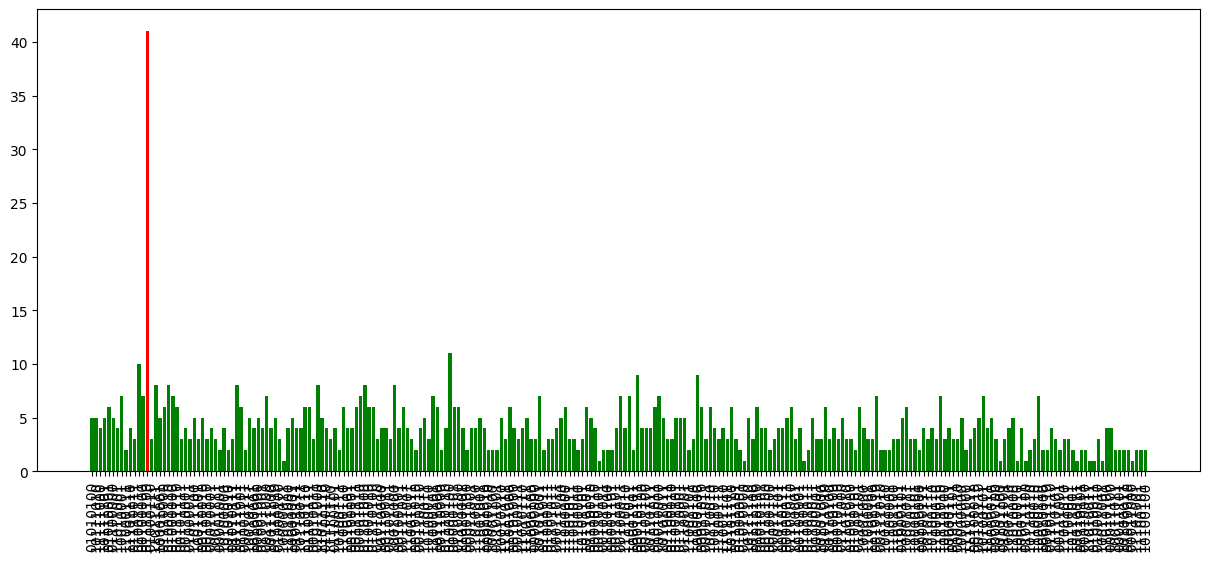

In [109]:
plt.figure(figsize=(15,6))
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.bar(most_likely_state,max(counts.values()),color='r')
plt.xticks(rotation=90)
plt.show()

In [79]:
distinct_df.loc[distinct_df['age_bin']==most_likely_state]

,name,age,age_bin
757212,Carmelo Flores Laura,124,01111100


### classic

In [87]:
def brute_force_search(df,target_age):
    found_name = ""
    for index, row in df.iterrows():
        if (row['age'] == target_age):
            found_name = row['name']
    return found_name

In [90]:
# Code to be timed
target_age = 124
result = brute_force_search(distinct_df, target_age)

# Print the result
if result:
    print(f"Person found with age {target_age}: {', '.join(result)}")
else:
    print(f"No person found with age {target_age} ")

Person found with age 124: Carmelo Flores Laura


In [91]:
start_time = time.time()
result = brute_force_search(distinct_df, target_age)
end_time = time.time()

In [101]:
# Calculate and print the time taken
start_time = time.time()
result = brute_force_search(distinct_df, target_age)
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 0.19446349143981934 seconds


### connect ibm

In [95]:
from qiskit_ibm_runtime import QiskitRuntimeService


In [96]:
# Authenticate with IBM Quantum
service = QiskitRuntimeService(channel="ibm_quantum", 
                                token='')

In [97]:
# Select the backend
backend = service.backend(name="ibm_brisbane")

In [98]:
# Transpile the circuit for the selected backend
transpiled_circuit = transpile(grover_circuit, backend)

In [99]:
start_time = time.time()
result = simulator.run(transpiled_circuit, shots=1024).result()
end_time = time.time()

In [100]:
# Calculate and print the time taken
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 0.19446349143981934 seconds
